In [4]:
## Nome: Pedro Gasparelo Leme - 14602421
## Nome: Gabriel Dezejácomo Maruschi - 14571525

# Codigo paara o curso de estatistica - Objetivo: analizar o tempo de processamento de diferentes algoritmos de ordenação dependendo do tamanho da entrada, sempre considerando um caso medio

## algoritmos a serem usados: BubbleSort/ SelectionSort -> BigO(n²) // MergeSort/QuickSort BigO(n Log[n]) // RadixSort BigO(nk). para n sendo o tamanho da entrad

In [1]:
# Imports

import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [5]:
## medir tempo inicio = time.perf_counter()

## definição das funções 

# BigO(n²)

def bubble_sort(arr): # ordena colocando o numero de maior valor na posição correta
    n = len(arr) # obtem tamanho do array para ser ordenado
    inicio = time.perf_counter() # inicia o contador de tempo antes da ordenação iniciar
    troca = False
    for i in range(n): 
        # passa pela lista do início até o penúltimo elemento
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                # troca os elementos se estiverem fora de ordem
                aux = arr[j]
                arr[j] = arr[j + 1] 
                arr[j + 1] = aux
                troca = True
        if troca == False: # se nao teve troca, entao nao precisa mais 
            break
    fim = time.perf_counter()
    return (fim - inicio) #retorna o tempo total para que ocorra a ordenação

def selection_sort(arr): # ordena os numeros de menores valores na posicao correta primeiro
    n = len(arr) # obtem tamanho do array para ser ordenado
    inicio = time.perf_counter() # inicia o contador de tempo antes da ordenação iniciar
    for i in range(n):
        # encontra o índice do menor elemento na parte não ordenada
        pos_min = i
        for j in range(i + 1, n):
            if arr[j] < arr[pos_min]:
                pos_min = j # guarda o indice do numero de menor valor 
        # Troca o menor elemento encontrado na sua posicao correta
        aux = arr[i]
        arr[i] = arr[pos_min]
        arr[pos_min] = aux
    fim = time.perf_counter()
    return (fim - inicio) #retorna o tempo total para que ocorra a ordenação

# BigO( n log[n] )

def merge_sort(arr):

    if len(arr) > 1: # se for igual a 1, retorna o proprio valor do array, voltando assim a arvore de recursao das metades separadas
        meio = len(arr) // 2
        esquerda = arr[:meio] # notação para array que copia todos os numeros do array original, da metade para frente
        direita = arr[meio:]  # notação para array que copia todos os numeros do array original, da metade para tras

        # Utiliza recursão para ordenar o array em metades
        merge_sort(esquerda)
        merge_sort(direita)

        # combina as duas metades ordenadas 
        i = j = k = 0
        while i < len(esquerda) and j < len(direita): # caso ainda esteja comparando os valores dos 2 arrays, pois eles ainda existem
            # verifica qual possui menor valor para colocar em ordem crescente no array de retorno
            if esquerda[i] < direita[j]:
                arr[k] = esquerda[i]
                i += 1
            else:
                arr[k] = direita[j]
                j += 1
            k += 1

        # caso ainda sobre valores em um array enquanto o outro ja foi finalizado, preenche o array de retorno com o restante
        while i < len(esquerda):
            arr[k] = esquerda[i]
            i += 1
            k += 1

        while j < len(direita):
            arr[k] = direita[j]
            j += 1
            k += 1

def medir_tempo_merge_sort(arr): # funcao auxiliar para calcular o tempo do merge_sort, uma vez que a chamada recursiva da funcao reinicia seu tempo de medicao
    inicio = time.perf_counter() # tempo de inicio
    merge_sort(arr) # executa array dado
    fim = time.perf_counter() # tempo final
    return fim - inicio # a diferenca dara o tempo de execucao
    
def quick_sort(arr):
    if len(arr) <= 1: # se tamanho do array for igual a 1, significa que a partição realizada pela chamada consecutiva da funcao recursiva, ja foi realizada
        return arr
    else:
        pivo = arr[0] # escolhendo o pivot como o primeiro elemento
        # coloca todos os valores do pivot escolhido a esquerda, caso eles sejam menores que o pivot
        menores = [x for x in arr[1:] if x <= pivo] 
        maiores = [x for x in arr[1:] if x > pivo]
        return quick_sort(menores) + [pivo] + quick_sort(maiores) # retorna a recursao da ordenação da metade menor que o pivot e maior que ainda devem ser organizadas

# Mede o tempo de execução do quicksort
def quick_sort_time(arr):
    inicio = time.perf_counter() # inicia o contador de tempo antes da ordenação iniciar
    quick_sort(arr)
    fim = time.perf_counter()
    return (fim - inicio) #retorna o tempo total para que ocorra a ordenação

#BioO(nk)

# definicao de uma função auxiliar que fara a contagem de digito a digito em especifico
def counting_sort_digito(arr, digito):
    n = len(arr) # obtem o tamanho da lista
    output = [0] * n # definicao da lista de saída, a qual esta inicialmente vazia
    count = [0] * 10 # definicao de um vetor para contar ocorrências de cada dígito (0-9)

    # loop que conta a frequência de cada dígito naquela casa decimal (unidade, dezena, etc.)
    for num in arr:
        index = (num // digito) % 10 # obtem o dígito atual do número
        count[index] += 1 # aumenta a contagem para aquele dígito

    # loop para acumular as posições, em quee count[i] contem a posicao final do digito i no output
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Constroi o array de saída (de trás pra frente para garantir estabilidade)
    for i in range(n - 1, -1, -1):
        index = (arr[i] // digito) % 10 # Extrai o dígito da posição atual
        output[count[index] - 1] = arr[i] # Coloca o número na posição correta no output
        count[index] -= 1 # Decrementa a posição para o próximo igual

    # Copia o array ordenado de volta para o original
    for i in range(n):
        arr[i] = output[i]

# Função principal: Radix Sort
def radix_sort(arr):
    inicio = time.perf_counter()
    
    if len(arr) == 0: # Caso a lista esteja vazia
        return arr
    max_num = max(arr) # Encontra o maior número da lista
    digito = 1 # Começa pelas unidades (1 = 10^0)

    # Repete o counting sort para cada casa decimal (unidade, dezena, centena...)
    while max_num // digito > 0: # Enquanto houver dígitos a processar
        counting_sort_digito(arr, digito)
        digito *= 10 # Vai para a próxima casa decimal (10, 100, ...)

    fim = time.perf_counter()
    return (fim - inicio) #retorna o tempo total para que ocorra a ordenação

In [1]:
# Vetor com os tamanhos
sizes_f = 10000
sizes_pace = 100
sizes = list(range(sizes_pace, sizes_f, sizes_pace))
print(len(sizes))

99


In [6]:
# Coleta dos tempos para entradas variadas
resultados = []
for i in sizes:
    np.random.seed(int(time.perf_counter()))
    arr = list(np.random.randint(0, sizes_f, i))

    # Tempo do bubble-sort
    time_bubble = bubble_sort(arr.copy())

    # Tempo do selection-sort
    time_slct = selection_sort(arr.copy())

    # Tempo do merge-sort
    time_merge = medir_tempo_merge_sort(arr.copy())

    # Tempo do quick-sort
    time_quick = quick_sort_time(arr.copy())

    # Tempo do radix-sort
    time_radix = radix_sort(arr.copy())

    resultados.append({
        "Tamanho do vetor" : i,
        "Tempo Bubble-sort": time_bubble,
        "Tempo Selection-sort": time_slct,
        "Tempo Merge-Sort": time_merge,
        "Tempo Quick-sort": time_quick,
        "Tempo Radix-sort": time_radix})

# Conversão para DataFrame
df = pd.DataFrame(resultados)
        
    

In [11]:
# Importa de um .csv

df = pd.read_csv('sortingTimes.csv')

In [3]:
# Coleta dos tempos para entradas de tamanho constante (mesmo vetor)
m = 300
tamanho = 5000
resultadosConstante = []
np.random.seed(10)
arr = list(np.random.randint(0, 10000, tamanho))

for j in range(0, m):
    
    # Tempo do bubble-sort
    time_bubble = bubble_sort(arr.copy())

    # Tempo do selection-sort
    time_slct = selection_sort(arr.copy())

    # Tempo do merge-sort
    time_merge = medir_tempo_merge_sort(arr.copy())

    # Tempo do quick-sort
    time_quick = quick_sort_time(arr.copy())

    # Tempo do radix-sort
    time_radix = radix_sort(arr.copy())

    resultadosConstante.append({
        "Iteracao" : j,
        "Tempo Bubble-sort": time_bubble,
        "Tempo Selection-sort": time_slct,
        "Tempo Merge-Sort": time_merge,
        "Tempo Quick-sort": time_quick,
        "Tempo Radix-sort": time_radix})
    
df2 = pd.DataFrame(resultadosConstante)

In [34]:
# Importa de um .csv

df2 = pd.read_csv('sortingTimes(cteSize).csv')

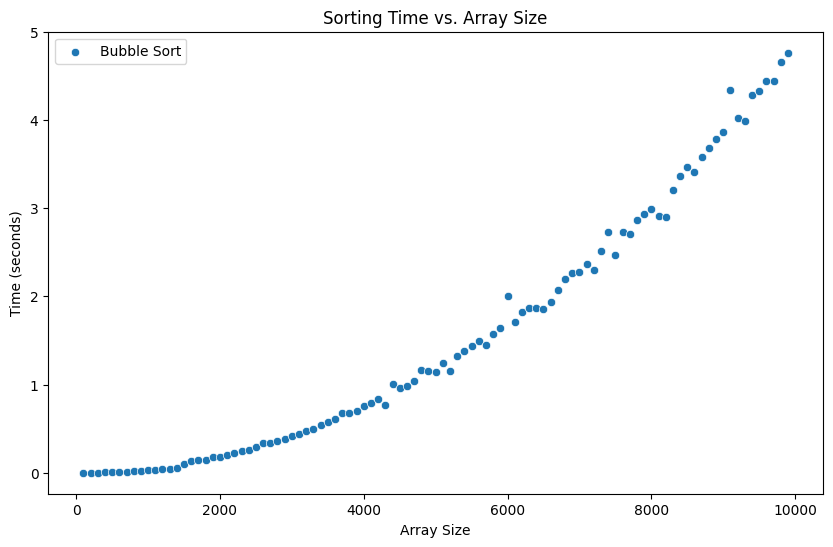

In [12]:
# Plotando resultados BubbleSort

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tamanho do vetor', y='Tempo Bubble-sort', label='Bubble Sort')
plt.title("Sorting Time vs. Array Size")
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

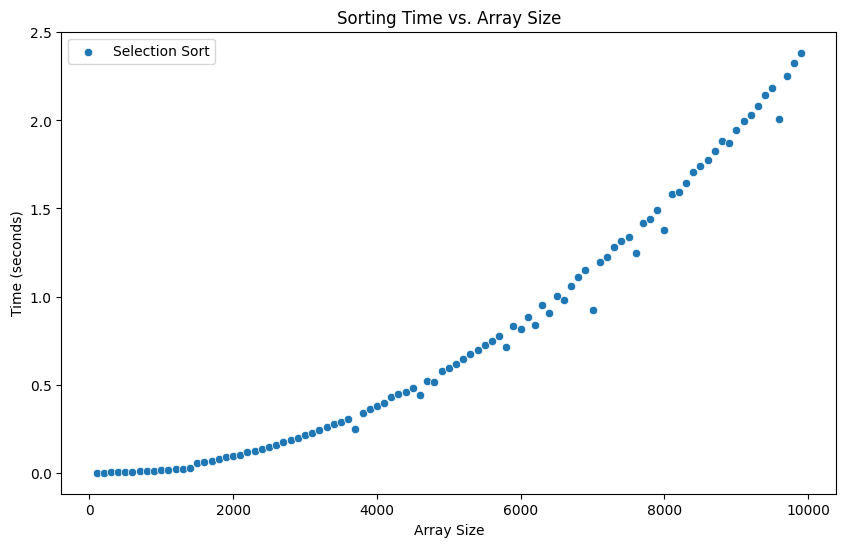

In [13]:
# Plotando resultados SelectionSort

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tamanho do vetor', y='Tempo Selection-sort', label='Selection Sort')
plt.title("Sorting Time vs. Array Size")
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

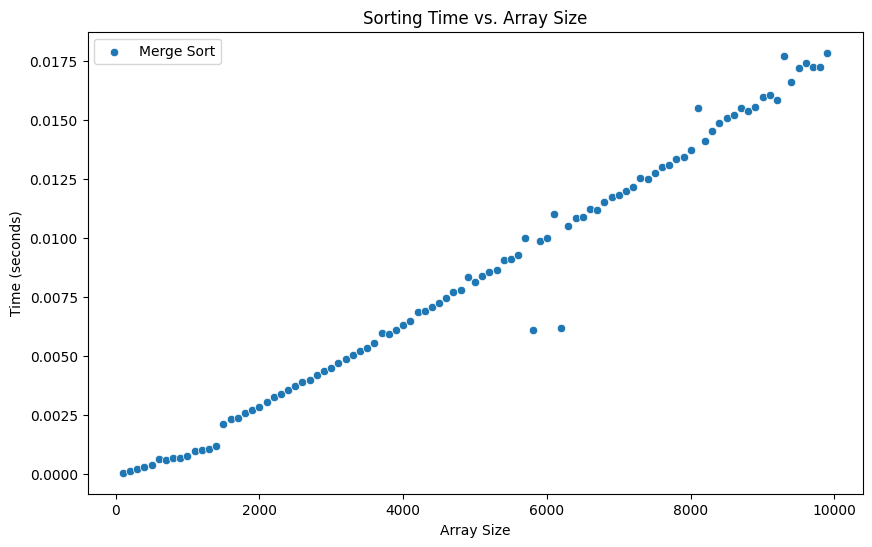

In [14]:
# Plotando resultados MergeSort

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tamanho do vetor', y='Tempo Merge-Sort', label='Merge Sort')
plt.title("Sorting Time vs. Array Size")
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

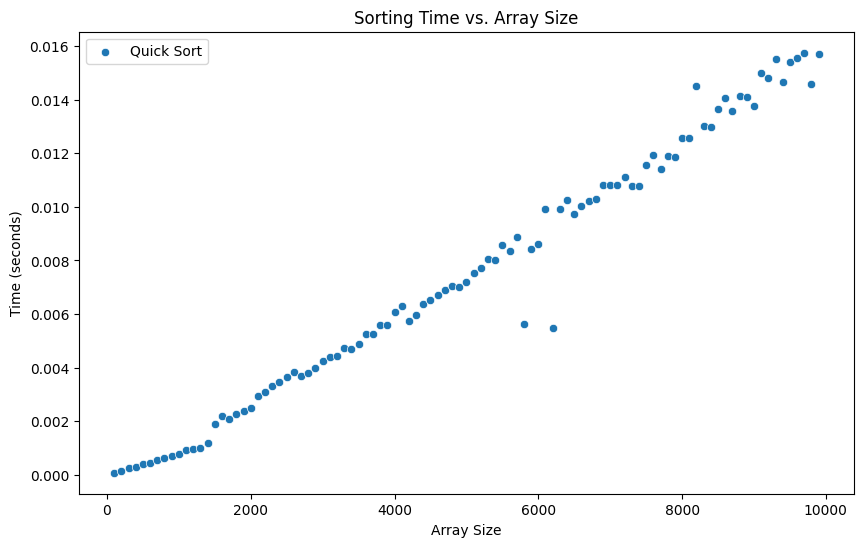

In [15]:
# Plotando resultados QuickSort

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tamanho do vetor', y='Tempo Quick-sort', label='Quick Sort')
plt.title("Sorting Time vs. Array Size")
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

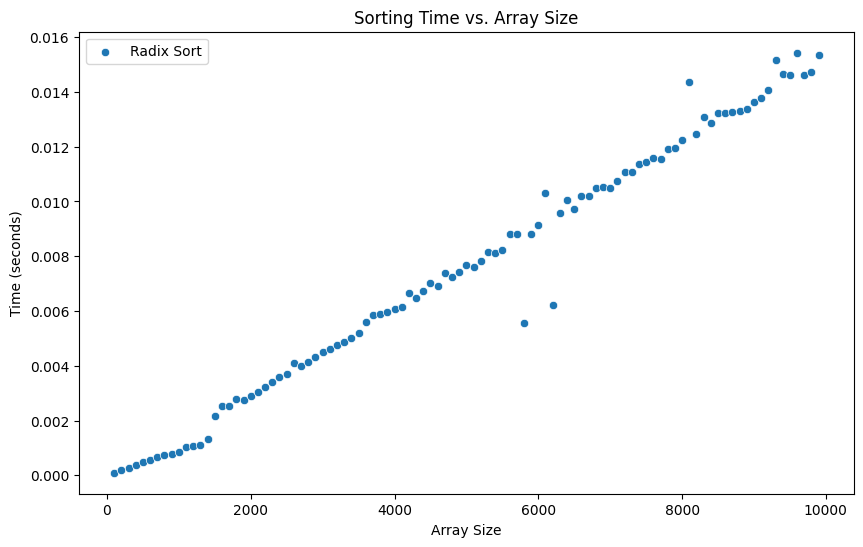

In [16]:
# Plotando resultados RadixSort

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tamanho do vetor', y='Tempo Radix-sort', label='Radix Sort')
plt.title("Sorting Time vs. Array Size")
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

In [17]:
# Exporta o Dataframe para um .csv
fileName = "sortingTimes(cteSize).csv"

df2.to_csv(fileName, index=False)

In [ ]:
# Exporta o Dataframe para um .csv
fileName = "sortingTimes.csv"

df.to_csv(fileName, index=False)

In [20]:
# Findada a coleta de dados, temos
# df : DataFrame com os tempos de execução de cada algoritmo para entradas de dados de tamanhos variadas
# df2: DataFrame com os tempos de execução de cada algorimo para varias entradas com tamanhos iguais

# Para tamanhos constantes, encontraremos a média por inferência estatística com o uso de um intervalo de confiança. Vale lembrar que a variância é desconhecida.
# Vale destacar que apesar de usarmos distribuição t de Student, o valor convergeria caso usássemos a distribuição normal padrão, já que n>>30 
def MediaInferencia(arr):

    amostra_py = arr.to_list()
    amostra = np.array(amostra_py)
    
    n = len(amostra)
    mediaAmostra = np.mean(amostra)
    desvioAmostra = np.std(amostra, ddof=1)  # ddof=1 para estimador nao-viesado

    alpha = 0.05  # 95% confiança
    tCritico = stats.t.ppf(1 - alpha/2, df=n-1)
    margemErro = tCritico * (desvioAmostra / np.sqrt(n))

    limiteInf = mediaAmostra - margemErro
    limiteSup = mediaAmostra + margemErro

    print(f"Media da Amostra (x̄): {mediaAmostra:.4f} s")
    print(f"Margem de erro: ±{margemErro:.6f} s")
    print(f"95% Intervalo de confiança da Média da população: [{limiteInf:.4f}, {limiteSup:.4f}] sec")

    media_estimada, sigma_estimado = stats.norm.fit(amostra)

    print("Estimativa de média:", media_estimada)
    print("Estimativa de desvio padrão:", sigma_estimado)


In [21]:
# Média da população para tempo de execução do BubbleSort
print("Bubble-sort:")
MediaInferencia(df2['Tempo Bubble-sort'])
print()

# Média da população para tempo de execução do SelectionSort
print("Selection-sort:")
MediaInferencia(df2['Tempo Selection-sort'])
print()

# Média da população para tempo de execução do MergeSort
print("Merge-sort")
MediaInferencia(df2['Tempo Merge-Sort'])
print()

# Média da população para tempo de execução do QuickSort
print("Quick-sort")
MediaInferencia(df2['Tempo Quick-sort'])
print()

# Média da população para tempo de execução do RadixSort
print("Radix-sort")
MediaInferencia(df2['Tempo Radix-sort'])
print()

Bubble-sort:
Media da Amostra (x̄): 1.1869 s
Margem de erro: ±0.003933 s
95% Intervalo de confiança da Média da população: [1.1830, 1.1909] sec
Estimativa de média: 1.1869225066633264
Estimativa de desvio padrão: 0.03455703742687648

Selection-sort:
Media da Amostra (x̄): 0.5919 s
Margem de erro: ±0.001886 s
95% Intervalo de confiança da Média da população: [0.5900, 0.5938] sec
Estimativa de média: 0.5918939576766775
Estimativa de desvio padrão: 0.016573771958024765

Merge-sort
Media da Amostra (x̄): 0.0081 s
Margem de erro: ±0.000057 s
95% Intervalo de confiança da Média da população: [0.0081, 0.0082] sec
Estimativa de média: 0.00811640491000612
Estimativa de desvio padrão: 0.0005034628112905443

Quick-sort
Media da Amostra (x̄): 0.0076 s
Margem de erro: ±0.000052 s
95% Intervalo de confiança da Média da população: [0.0075, 0.0076] sec
Estimativa de média: 0.007575074083325289
Estimativa de desvio padrão: 0.00045535207248581625

Radix-sort
Media da Amostra (x̄): 0.0075 s
Margem de err

In [22]:
# Para tempo variante, calcularemos a Correlação de Spearman (BUSCAR BIBLIOGRAFIA) entre tamanho da entrada e tempo de execução
# Para rho aprox. = 1 e p < 0,05 confirma-se uma relação monotonica
from scipy.stats import spearmanr

def CorrelacaoSpearman(arr1, arr2):
    array1 = np.array(arr1.to_list())
    array2 = np.array(arr2.to_list())
    
    rho, p_value = spearmanr(array1, array2)
    print(f"Spearman’s ρ: {rho:.3f} (p-value: {p_value:.3f})")

In [23]:
# Correlação de Spearman para Tamanho do vetor x Tempo de execução BubbleSort
print("Bubble Sort")
CorrelacaoSpearman(df['Tamanho do vetor'], df['Tempo Bubble-sort'])
print()

# Correlação de Spearman para Tamanho do vetor x Tempo de execução SelectionSort
print("Selection Sort")
CorrelacaoSpearman(df['Tamanho do vetor'], df['Tempo Selection-sort'])
print()

# Correlação de Spearman para Tamanho do vetor x Tempo de execução MergeSort
print("Merge Sort")
CorrelacaoSpearman(df['Tamanho do vetor'], df['Tempo Merge-Sort'])
print()

# Correlação de Spearman para Tamanho do vetor x Tempo de execução QuickSort
print("Quick Sort")
CorrelacaoSpearman(df['Tamanho do vetor'], df['Tempo Quick-sort'])
print()

# Correlação de Spearman para Tamanho do vetor x Tempo de execução RadixSort
print("Radix Sort")
CorrelacaoSpearman(df['Tamanho do vetor'], df['Tempo Radix-sort'])
print()

Bubble Sort
Spearman’s ρ: 0.999 (p-value: 0.000)

Selection Sort
Spearman’s ρ: 0.999 (p-value: 0.000)

Merge Sort
Spearman’s ρ: 0.994 (p-value: 0.000)

Quick Sort
Spearman’s ρ: 0.992 (p-value: 0.000)

Radix Sort
Spearman’s ρ: 0.993 (p-value: 0.000)



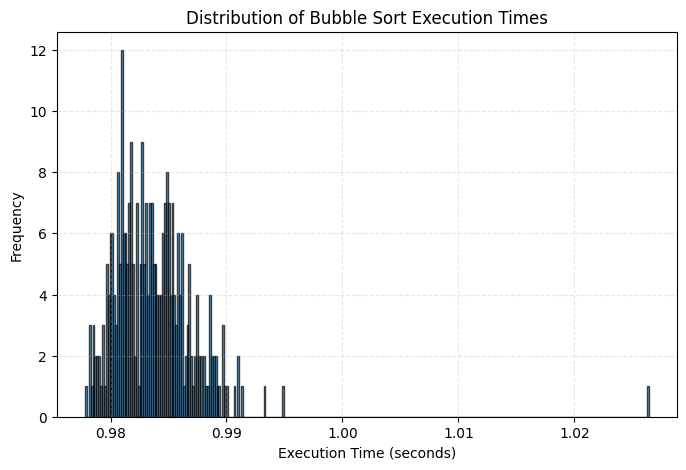

In [35]:
m = 300
plt.figure(figsize=(8, 5))
plt.hist(df2["Tempo Bubble-sort"], bins=m, edgecolor="black", alpha=0.7)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Bubble Sort Execution Times")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

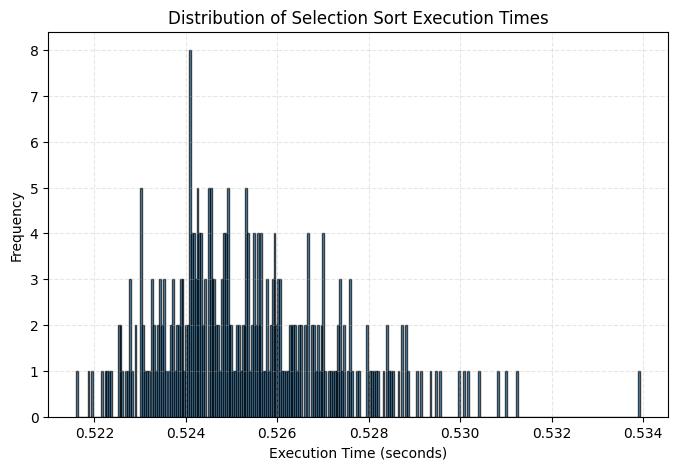

In [36]:
plt.figure(figsize=(8, 5))
plt.hist(df2["Tempo Selection-sort"], bins=m, edgecolor="black", alpha=0.7)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Selection Sort Execution Times")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

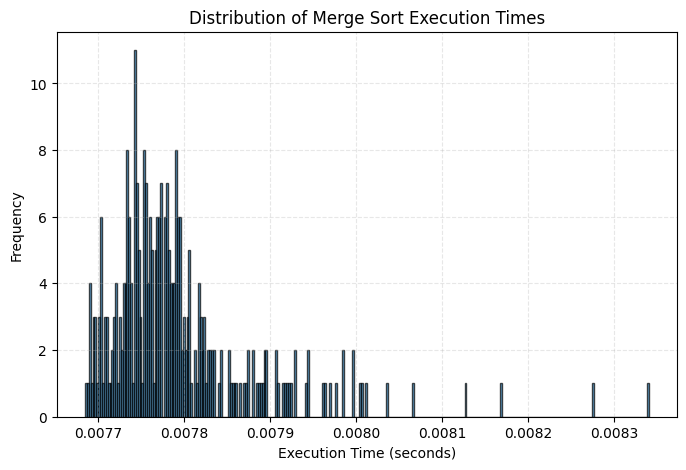

In [37]:
plt.figure(figsize=(8, 5))
plt.hist(df2["Tempo Merge-Sort"], bins=m, edgecolor="black", alpha=0.7)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Merge Sort Execution Times")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

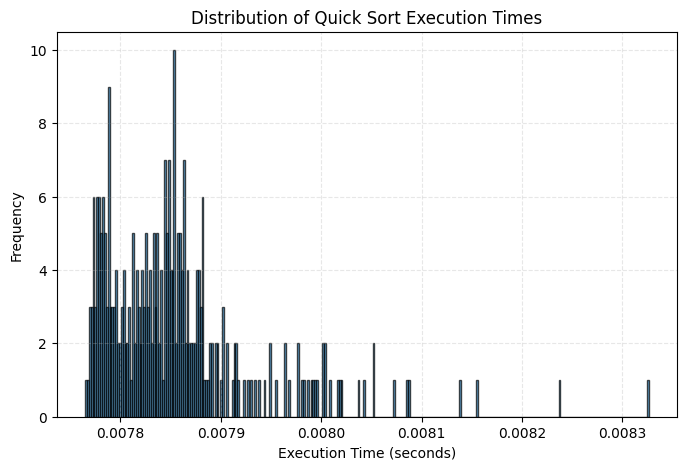

In [38]:
plt.figure(figsize=(8, 5))
plt.hist(df2["Tempo Quick-sort"], bins=m, edgecolor="black", alpha=0.7)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Quick Sort Execution Times")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

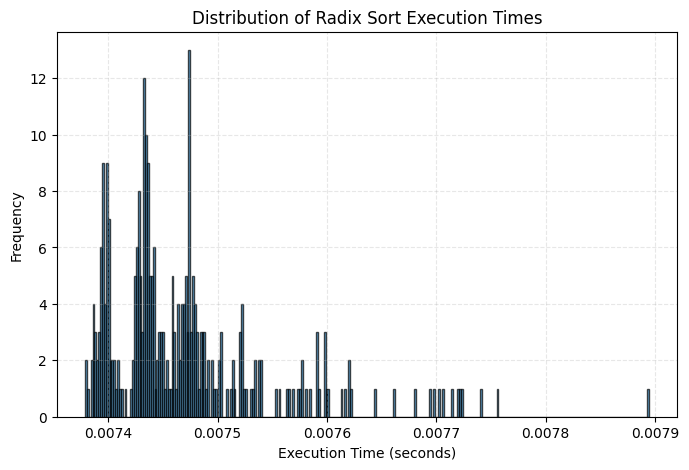

In [39]:
plt.figure(figsize=(8, 5))
plt.hist(df2["Tempo Radix-sort"], bins=m, edgecolor="black", alpha=0.7)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Radix Sort Execution Times")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

In [40]:
#K-S test
from scipy.stats import kstest, norm

def ks_hypothesis(arr):

    # Média e desvio estimados
    mean, std = np.mean(arr), np.std(arr)

    # KS test para confrontando dados amostrais com uma distribuição normal
    ks_statistic, p_value = kstest(arr, 'norm', args=(mean, std))

    print(f"K-S Statistic: {ks_statistic:.4f}, p-value: {p_value:.10f}")

    if p_value > 0.05:
        print("Dados possuem distribuição normal: falhou ao rejeitar H₀")
    else:
        print("Dados não possuem distribuição normal: rejeitou H₀")
    print()

In [41]:
#removing outliers function
from scipy.stats import zscore

def remOutliers(arr):
    Q1, Q3 = np.percentile(arr, [25, 75])
    IQR = Q3 - Q1
    #lower_bound = Q1 - 1.5 * IQR
    lower_bound = 0
    upper_bound = Q3 + 1.5 * IQR

    cleaned_data = arr[(arr >= lower_bound) & (arr <= upper_bound)]

    return cleaned_data

In [42]:
bubble_cleaned = remOutliers(df2["Tempo Bubble-sort"])
selection_cleaned = remOutliers(df2["Tempo Selection-sort"])
merge_cleaned = remOutliers(df2["Tempo Merge-Sort"])
quick_cleaned = remOutliers(df2["Tempo Quick-sort"])
radix_cleaned = remOutliers(df2["Tempo Radix-sort"])

In [43]:
# KS test para as amostras de cada algoritmo (entrada de tamanho constante)

# Bubble-sort
print("Bubble sort:")
ks_hypothesis(bubble_cleaned)

# Selection-sort
print("Selection sort:")
ks_hypothesis(selection_cleaned)

# Merge-sort
print("Merge sort:")
ks_hypothesis(merge_cleaned)

# Quick-sort
print("Quick sort:")
ks_hypothesis(quick_cleaned)

# Radix-sort
print("Radix sort:")
ks_hypothesis(radix_cleaned)


Bubble sort:
K-S Statistic: 0.0659, p-value: 0.1444764743
Dados possuem distribuição normal: falhou ao rejeitar H₀

Selection sort:
K-S Statistic: 0.0697, p-value: 0.1094854783
Dados possuem distribuição normal: falhou ao rejeitar H₀

Merge sort:
K-S Statistic: 0.0797, p-value: 0.0558739235
Dados possuem distribuição normal: falhou ao rejeitar H₀

Quick sort:
K-S Statistic: 0.0708, p-value: 0.1175449600
Dados possuem distribuição normal: falhou ao rejeitar H₀

Radix sort:
K-S Statistic: 0.0951, p-value: 0.0141114568
Dados não possuem distribuição normal: rejeitou H₀



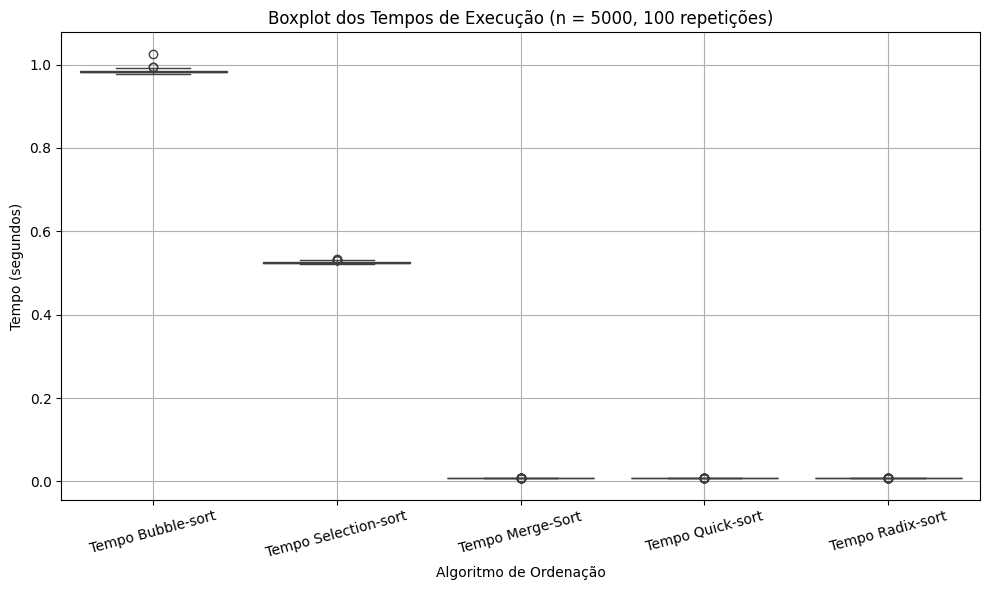

In [44]:
# Derrete o DataFrame para o formato longo (long-form)
df2_meltado = pd.melt(
    df2,
    id_vars=["Iteracao"],
    value_vars=[
        "Tempo Bubble-sort",
        "Tempo Selection-sort",
        "Tempo Merge-Sort",
        "Tempo Quick-sort",
        "Tempo Radix-sort"
    ],
    var_name="Algoritmo",
    value_name="Tempo"
)

# Cria o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2_meltado, x="Algoritmo", y="Tempo")
plt.title("Boxplot dos Tempos de Execução (n = 5000, 100 repetições)")
plt.ylabel("Tempo (segundos)")
plt.xlabel("Algoritmo de Ordenação")
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()

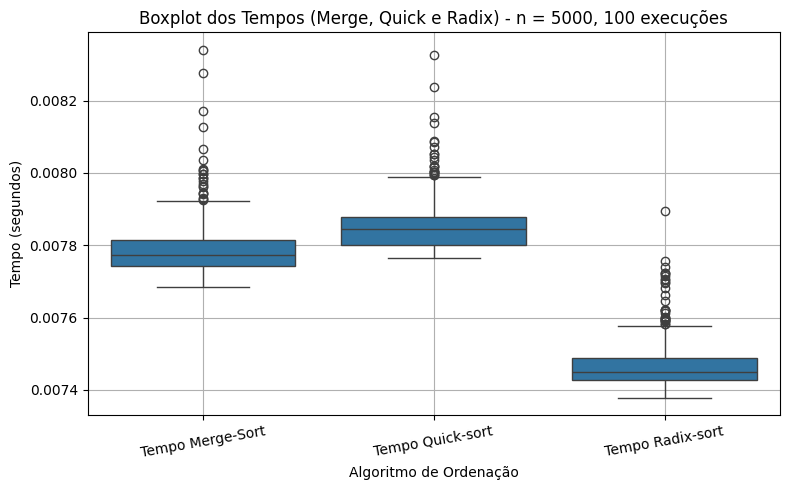

In [45]:
#seleciona apenas o Merge, Quick e Radix sort para melhor observacao
df2_meltado_top3 = pd.melt(
    df2,
    id_vars=["Iteracao"],
    value_vars=[
        "Tempo Merge-Sort",
        "Tempo Quick-sort",
        "Tempo Radix-sort"
    ],
    var_name="Algoritmo",
    value_name="Tempo"
)

# Cria o boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df2_meltado_top3, x="Algoritmo", y="Tempo")
plt.title("Boxplot dos Tempos (Merge, Quick e Radix) - n = 5000, 100 execuções")
plt.ylabel("Tempo (segundos)")
plt.xlabel("Algoritmo de Ordenação")
plt.xticks(rotation=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
## PARTE 2 DO TRABALHO 
## Para o caso de varias entradas de mesmo tamanho

## funcao media inferencia alterada para dar media estimada e desvio padrao medio ( Estimacao de parametros)

## teste de hipoteses: sera aplicado para a media real da amostra e para a media estimada

def TesteHipoteses(arr):
    # Conversão do array para numpy
    amostra = np.array(arr.to_list())

    media_estimada, sigma_estimado = stats.norm.fit(amostra)
    mediaAmostra = np.mean(amostra)
    desvioAmostra = np.std(amostra, ddof=1)  # ddof=1 para estimador nao-viesado

    print("Estimativa de média (uso de fit):", media_estimada)
    print("Média da amostra:", mediaAmostra)
    print("Desvio padrão estimado:", sigma_estimado)
    print("Desvio padrão da amostra:", desvioAmostra)
    print()

    #definicao do alpha
    alpha = 0.05

    # Teste 1 da media igual ah estimada (uso da funcao fit)
    t1, p1 = stats.ttest_1samp(amostra, media_estimada)
    print("Teste 1 media igual ah media estimada")
    print(f"t = {t1:.4f}, p = {p1:.4f}") # print ate a 4a casa decimal
    if p1 < alpha:
        print(" média diferente da estimada")
    else:
        print(" Nao ha evidencia contra o valor da media estimada")
    print()

    # Teste 2 da média ser igual ah própria média (espera-se t=0, p=1)
    t2, p2 = stats.ttest_1samp(amostra, mediaAmostra)
    print("Teste 2 media igual ah media da propria amostra")
    print(f"t = {t2:.4f}, p = {p2:.4f}") # print com casas decimais controladas
    if p2 < alpha:
        print("media diferente da amostra")
    else:
        print("nenhuma evidência contra a média da amostra")

In [47]:
# Teste de hipoteses para tempo de execução do BubbleSort
print("Bubble-sort:")
TesteHipoteses(df2['Tempo Bubble-sort'])
print()

# Teste de hipoteses para tempo de execução do SelectionSort
print("Selection-sort:")
TesteHipoteses(df2['Tempo Selection-sort'])
print()

# Teste de hipoteses para tempo de execução do MergeSort
print("Merge-sort")
TesteHipoteses(df2['Tempo Merge-Sort'])
print()

# Teste de hipoteses para tempo de execução do QuickSort
print("Quick-sort")
TesteHipoteses(df2['Tempo Quick-sort'])
print()

# Teste de hipoteses para tempo de execução do RadixSort
print("Radix-sort")
TesteHipoteses(df2['Tempo Radix-sort'])
print()

Bubble-sort:
Estimativa de média (uso de fit): 0.9836895801700212
Média da amostra: 0.9836895801700212
Desvio padrão estimado: 0.00390328231259192
Desvio padrão da amostra: 0.003909804092098249

Teste 1 media igual ah media estimada
t = 0.0000, p = 1.0000
 Nao ha evidencia contra o valor da media estimada

Teste 2 media igual ah media da propria amostra
t = 0.0000, p = 1.0000
nenhuma evidência contra a média da amostra

Selection-sort:
Estimativa de média (uso de fit): 0.5253872750966806
Média da amostra: 0.5253872750966806
Desvio padrão estimado: 0.0019042397344584292
Desvio padrão da amostra: 0.0019074214237857082

Teste 1 media igual ah media estimada
t = 0.0000, p = 1.0000
 Nao ha evidencia contra o valor da media estimada

Teste 2 media igual ah media da propria amostra
t = 0.0000, p = 1.0000
nenhuma evidência contra a média da amostra

Merge-sort
Estimativa de média (uso de fit): 0.00779271492336188
Média da amostra: 0.00779271492336188
Desvio padrão estimado: 8.765803738819444e-

In [48]:
# Os resultados acima mostram que os resultados estimados e os da amostra sao exatamente iguais, ou seja, os dados estao de acordo com a hipotese testada

# Modelagem por regressao linear ( uso para diferentes entradas df)

#inclusao das bibliotecas que fornecem a funcao de regressao linear
from sklearn.linear_model import LinearRegression
import numpy as np

def regressao_algoritmo(df, nome_coluna):
    X = df["Tamanho do vetor"].values.reshape(-1, 1)
    y = df[nome_coluna].values

    modelo = LinearRegression()
    modelo.fit(X, y)

    coef = modelo.coef_[0]
    intercepto = modelo.intercept_
    r2 = modelo.score(X, y)

    print(f"Algoritmo: {nome_coluna}")
    print(f"Equação: tempo = {coef} * tamanho + {intercepto:.6f}")
    print(f"R²: {r2:.4f}")
    print()

    return modelo


In [49]:
algoritmos = [
    "Tempo Bubble-sort",
    "Tempo Selection-sort",
    "Tempo Merge-Sort",
    "Tempo Quick-sort",
    "Tempo Radix-sort"
]

for nome in algoritmos:
    regressao_algoritmo(df, nome)

Algoritmo: Tempo Bubble-sort
Equação: tempo = 0.0004752184194387143 * tamanho + -0.814327
R²: 0.9313

Algoritmo: Tempo Selection-sort
Equação: tempo = 0.0002378174363246801 * tamanho + -0.408364
R²: 0.9308

Algoritmo: Tempo Merge-Sort
Equação: tempo = 1.8446409285090972e-06 * tamanho + -0.000929
R²: 0.9847

Algoritmo: Tempo Quick-sort
Equação: tempo = 1.6455023186158638e-06 * tamanho + -0.000759
R²: 0.9825

Algoritmo: Tempo Radix-sort
Equação: tempo = 1.5748015510203173e-06 * tamanho + -0.000340
R²: 0.9850



In [ ]:
## pode-se observar dos resultados acima o esperado, algoritmos de ordem n² tendo um valor de a elevado pois com o aumento da entrada o tempo cresce mais quando comparado as outras funcoes
## o tempo dos algoritmos n log(n) e radix sort tambem estao de acordo com os valores esperados
## o valor b representa o valor da funcao para entrada igual a 0, podendo representar um ruido nas medicoes ou um ajuste vertical para se ajustar a regressao, se analisado dessa forma, os resultados de
## b para os algoritmos de ordem n log n e kn estao de acordo com o esperado

## somados a isso, o valor de R² nos diz que o ajuste realizado pela regressao se encontra em estado de ajuste excelente ( para valores >0.9 ), respondendo, para todas as funcoes, que 
## o tempo cresce de forma previsivel com o tamanho da entrada

## contudo foi feito a regressao linear para todas as funcoes, o que só se aplica para o radix sort, uma vez que ele é kx, para as outras funcoes vamos adaptar a regressao linear de forma que tenhamos
## regressao em n² e n log(n)

In [50]:
def regressao_n2_algoritmo(df, nome_coluna):
    X_quad = (df["Tamanho do vetor"] ** 2).values.reshape(-1, 1)
    y = df[nome_coluna].values

    modelo = LinearRegression()
    modelo.fit(X_quad, y)

    coef = modelo.coef_[0]
    intercepto = modelo.intercept_
    r2 = modelo.score(X_quad, y)

    print(f"Algoritmo: {nome_coluna}")
    print(f"Equação a*n² + b: tempo = {coef} * tamanho + {intercepto:.6f}")
    print(f"R²: {r2:.4f}")
    print()

    return modelo

def regressao_nlogn_algoritmo(df, nome_coluna):
    n = df["Tamanho do vetor"].values
    X_nlogn = (n * np.log2(n)).reshape(-1, 1)
    y = df[nome_coluna].values

    modelo = LinearRegression()
    modelo.fit(X_nlogn, y)

    coef = modelo.coef_[0]
    intercepto = modelo.intercept_
    r2 = modelo.score(X_nlogn, y)

    print(f"Algoritmo: {nome_coluna}")
    print(f"Equação a*n log(n) + b: tempo = {coef} * tamanho + {intercepto:.6f}")
    print(f"R²: {r2:.4f}")
    print()

    return modelo

In [51]:
regressao_n2_algoritmo(df, "Tempo Bubble-sort")
regressao_n2_algoritmo(df, "Tempo Selection-sort")

regressao_nlogn_algoritmo(df, "Tempo Merge-Sort")
regressao_nlogn_algoritmo(df, "Tempo Quick-sort")

Algoritmo: Tempo Bubble-sort
Equação a*n² + b: tempo = 4.763069546980234e-08 * tamanho + -0.017986
R²: 0.9967

Algoritmo: Tempo Selection-sort
Equação a*n² + b: tempo = 2.3840880937253705e-08 * tamanho + -0.010000
R²: 0.9965

Algoritmo: Tempo Merge-Sort
Equação a*n log(n) + b: tempo = 1.3633112931429234e-07 * tamanho + -0.000267
R²: 0.9866

Algoritmo: Tempo Quick-sort
Equação a*n log(n) + b: tempo = 1.2159037860183095e-07 * tamanho + -0.000166
R²: 0.9840



LinearRegression()

In [52]:
## como pode ser observado acima, o valor de R² agora é maior que o da regressao linear mostrada anteriormente, mostrando que ele é mais preciso quando comparado
## contudo, o valor de a dado pela regressao linear pode parecer contraditorio, contudo o mesmo nao esta errado, uma vez que o termo n² cresce muito mais rapidamente, nao sendo justa a comparacao
## entre o a de n² e o de n log(n), mas sim, valendo a pena a comparaçao entre os algoritmos de mesma complexidade

In [53]:
# Como mostrado anteriormente, as amostras (após a remoção de outliers) possuem distribuição aproximadamente normal
# O próximo critério para realizar ANOVA é observar a homogeneidade das amostras

from scipy.stats import levene

stat, p = levene(bubble_cleaned, selection_cleaned, merge_cleaned, quick_cleaned)
print(f"P-value de Levene: {p:.4f}", end=" → ")
if p > 0.05:
    print("Variâncias iguais, critério atendido")
else:
    print("Variâncias desiguais.")

P-value de Levene: 0.0000 → Variâncias desiguais.


In [54]:
# Já que o critério não foi atendido, realizaremos a ANOVA de Welch

import statsmodels.api as sm
from statsmodels.formula.api import ols

df2_long = df2.melt(
    id_vars=['Iteracao'],  
    value_vars=[
        'Tempo Bubble-sort',
        'Tempo Selection-sort',
        'Tempo Merge-Sort',
        'Tempo Quick-sort'
    ],
    var_name='Algoritmo',
    value_name='Tempo'      
)

# Remove "Tempo " prefix from algorithm names for cleaner labels
df2_long['Algoritmo'] = df2_long['Algoritmo'].str.replace('Tempo ', '')

# Fit the model
model = ols('Tempo ~ Algoritmo', data=df2_meltado).fit()

# Welch's ANOVA (using HC3 robust variance)
welch_results = sm.stats.anova_lm(model, typ=2, robust='hc3')
print(welch_results)


               sum_sq      df             F  PR(>F)
Algoritmo  153.955702     4.0  1.015820e+07     0.0
Residual     0.005664  1495.0           NaN     NaN


In [55]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df2_long['Tempo'],  
    groups=df2_long['Algoritmo'], 
    alpha=0.05
)
print(tukey.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2     meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------
Bubble-sort     Merge-Sort  -0.9759    0.0 -0.9764 -0.9754   True
Bubble-sort     Quick-sort  -0.9758    0.0 -0.9763 -0.9754   True
Bubble-sort Selection-sort  -0.4583    0.0 -0.4588 -0.4578   True
 Merge-Sort     Quick-sort   0.0001 0.9845 -0.0004  0.0005  False
 Merge-Sort Selection-sort   0.5176    0.0  0.5171  0.5181   True
 Quick-sort Selection-sort   0.5175    0.0  0.5171   0.518   True
-----------------------------------------------------------------


In [57]:
# Realizaremos o teste de Pearson Qui-quadrado para testar a independencia entre a escolha do algoritmo e a performance

# Primeiro, criaremos uma tabela de contigência para nossos dados, agrupando-os em células discretas

# Dataframe no formato longo

from scipy.stats import chi2_contingency

df_long = df.melt(
    id_vars=['Tamanho do vetor'],
    value_vars=['Tempo Bubble-sort', 'Tempo Selection-sort', 'Tempo Merge-Sort', 'Tempo Quick-sort', 'Tempo Radix-sort'],
    var_name='Algorithm',
    value_name='Time'
)

# Categorizando o tempo em referências discretas
threshold = 0.01
df_long['TimeCategory'] = ['Fast' if t < threshold else 'Slow' for t in df_long['Time']]

# Tabela de contingencia
contingency_table = pd.crosstab(
    index=df_long['Algorithm'],  # Linhas: Algoritmo
    columns=df_long['TimeCategory']  # Colunas: Fast/Slow
)

print("Tabela de Contingência:")
print(contingency_table)
print()

# Avaliaremos agora se a escolha do algoritmo interfere no desempenho.
# A hipótese nula H0 é: algoritmo e categoria de tempo são independentes.
# p-value < 0.05 : H0 rejeitada. Associação significativa entre categoria de tempo e escolha do algoritmo
# p-value >= 0.05 : Falha ao rejeitar H0. Não há relação entre a categoria de tempo e o algoritmo. 

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2:.3f}")
print(f"P-value: {p_value:.3f}")

Tabela de Contingência:
TimeCategory          Fast  Slow
Algorithm                       
Tempo Bubble-sort        6    93
Tempo Merge-Sort        60    39
Tempo Quick-sort        64    35
Tempo Radix-sort        63    36
Tempo Selection-sort     8    91

Chi-squared statistic: 154.328
P-value: 0.000
